In [1]:
import os

import numpy as np
import pandas as pd

import scanpy as sc

In [2]:
sc.set_figure_params(dpi=80, dpi_save=300)

In [3]:
import time
import logging
logging.basicConfig(filename='./logging.txt', level=logging.DEBUG)

In [18]:
import glob
file_names = glob.glob("../../orig_data/10X/*")
adata_list = []
for fname in file_names:
    adata = sc.read_10x_mtx(fname)
    basename = os.path.basename(fname).split('-')[-1]
    adata.obs_names = adata.obs_names.map(lambda x: basename+'_'+x.split('-')[0])
    adata_list.append(adata)

In [19]:
dge = adata_list[0].concatenate(adata_list[1:], join='outer')

/home/ggj/anaconda3/lib/python3.7/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/home/ggj/anaconda3/lib/python3.7/site-packages/scipy/sparse/lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


In [24]:
#check
print(dge.shape)
print(dge.obs_names[-5:-1])
print(dge.var_names[1:5])
dge

(12361, 23433)
Index(['10X_P4_7_TTTGTCACACTGTTAG-7', '10X_P4_7_TTTGTCATCAAGAAGT-7',
       '10X_P4_7_TTTGTCATCAAGATCC-7', '10X_P4_7_TTTGTCATCATTCACT-7'],
      dtype='object')
Index(['Rp1', 'Sox17', 'Mrpl15', 'Lypla1'], dtype='object')


AnnData object with n_obs × n_vars = 12361 × 23433 
    obs: 'batch'
    var: 'gene_ids-0', 'gene_ids-1', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7'

In [15]:
anno_df = pd.DataFrame(dge.obs_names.values, columns=['CellID'])
anno_df['10X_CellID'] = anno_df['CellID'].apply(lambda x: x.split('-')[0])
#anno_df['Batch'] = anno_df['CellID'].apply(lambda x: x.split('.')[0])

In [4]:
dge = sc.read_h5ad("../Scanpy_all_tissue_dup/proc_data/dge.h5ad")

In [5]:
TENX_anno_df = pd.read_csv("../../orig_data/annotations_droplet.csv", header=0, index_col=0, sep=',')

/home/ggj/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
merged_anno_df = anno_df.join(TENX_anno_df, on='10X_CellID', how='left')[['CellID', 'cell_ontology_class', 'channel', 'tissue']]

In [29]:
celltype_dict = {
    'B cell':'B cell',
    'DN1 thymic pro-T cell':'T cell',
    'Fraction A pre-pro B cell':'B cell',
    'T cell':'T cell',
    'alveolar macrophage':'Macrophage',
    'basophil':'Basophil',
    'bladder cell':'Bladder cell',
    'bladder urothelial cell':'Bladder cell',
    'ciliated columnar cell of tracheobronchial tree':'Ciliated columnar cell',
    'classical monocyte':'Monocyte',
    'duct epithelial cell':'Epithelial cell',
    'early pro-B cell':'B cell',
    'endothelial cell':'Endothelial cell',
    'endothelial cell of hepatic sinusoid':'Endothelial cell',
    'erythroblast':'Erythroblast',
    'granulocyte':'Granulocyte',
    'granulocytopoietic cell':'Granulocyte',
    'hematopoietic precursor cell':'Hematopoietic precursor cell',
    'hepatocyte':'Hepatocyte',
    'immature B cell':'B cell',
    'immature T cell':'T cell',
    'kidney capillary endothelial cell':'Endothelial cell',
    'kidney cell':'Kidney cell',
    'kidney collecting duct epithelial cell':'Epithelial cell',
    'kidney loop of Henle ascending limb epithelial cell':'Epithelial cell',
    'kidney proximal straight tubule epithelial cell':'Epithelial cell',
    'late pro-B cell':'B cell',
    'leukocyte':'Leukocyte',
    'lung endothelial cell':'Endothelial cell',
    'macrophage':'Macrophage',
    'mast cell':'Mast cell',
    'mesangial cell':'Mesangial cell',
    'monocyte':'Monocyte',
    'myeloid cell':'Myeloid cell',
    'natural killer cell':'NK cell',
    'non-classical monocyte':'Monocyte',
    'proerythroblast':'Erythroblast',
    'promonocyte':'Monocyte',
    'stromal cell':'Stromal cell',
    'type II pneumocyte':'AT2 cell',
    'nan':'other'
}
def proc_cellAnno(x):
    x = str(x)
    if x in celltype_dict.keys():
        return celltype_dict[x]
    else:
        return x+'__CHECK__'
merged_anno_df['CellType'] = merged_anno_df['cell_ontology_class'].apply(proc_cellAnno)

In [30]:
for i in merged_anno_df.columns.values:
    dge.obs[i] = merged_anno_df[i].values

In [31]:
#check
print(dge.obs['CellID'][1:5])
print(dge.obs['batch'].unique())
print(dge.obs['batch'].describe())
print(dge.obs['CellType'].unique())
print(dge.obs['CellType'].describe())
print(dge)

index
10X_P7_9_AAACCTGGTAAACACA-0    10X_P7_9_AAACCTGGTAAACACA-0
10X_P7_9_AAACCTGGTGAGTGAC-0    10X_P7_9_AAACCTGGTGAGTGAC-0
10X_P7_9_AAACCTGGTTACGCGC-0    10X_P7_9_AAACCTGGTTACGCGC-0
10X_P7_9_AAACCTGTCAGTACGT-0    10X_P7_9_AAACCTGTCAGTACGT-0
Name: CellID, dtype: object
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Categories (10, object): [0, 1, 2, 3, ..., 6, 7, 8, 9]
count     9125
unique      10
top          8
freq      1981
Name: batch, dtype: object
['Monocyte' 'NK cell' 'T cell' 'Macrophage' 'Leukocyte' 'Myeloid cell'
 'Endothelial cell' 'Stromal cell' 'B cell' 'Mast cell'
 'Ciliated columnar cell' 'other' 'AT2 cell' 'Mesangial cell'
 'Kidney cell' 'Epithelial cell' 'Bladder cell' 'Hepatocyte' 'Granulocyte'
 'Erythroblast' 'Hematopoietic precursor cell' 'Basophil']
count       9125
unique        22
top       T cell
freq        1728
Name: CellType, dtype: object
AnnData object with n_obs × n_vars = 9125 × 23433 
    obs: 'Batch', 'batch', 'CellID', 'cell_ontology_class', 'channel', 'tissue', 'Cel

In [32]:
adata = dge.copy()

In [33]:
adata

AnnData object with n_obs × n_vars = 9125 × 23433 
    obs: 'Batch', 'batch', 'CellID', 'cell_ontology_class', 'channel', 'tissue', 'CellType'
    var: 'gene_ids-0', 'gene_ids-1', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9'

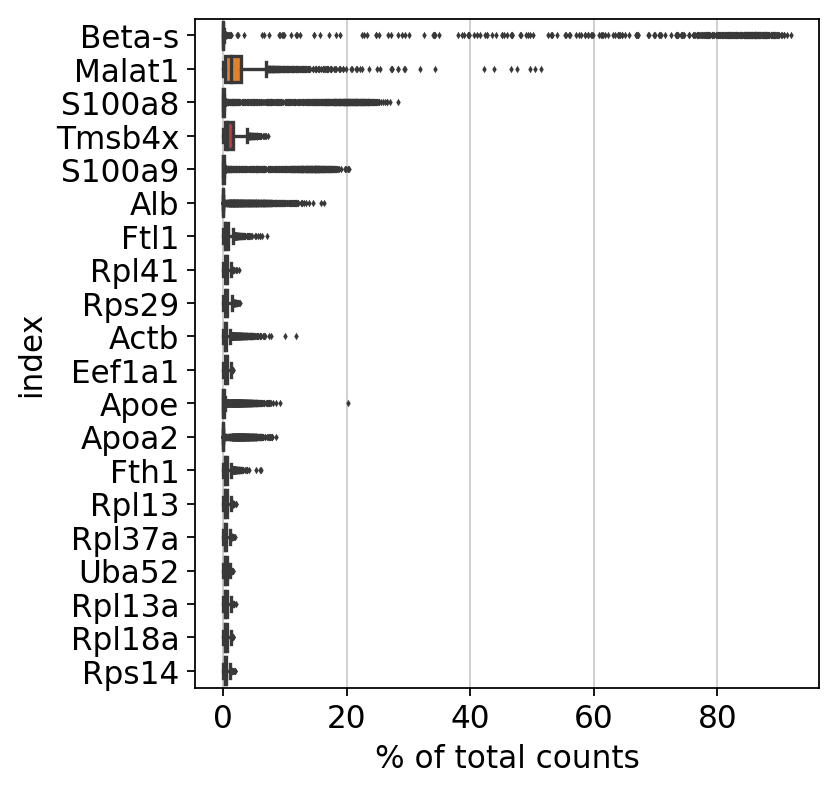

In [34]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [35]:
# filter
sc.pp.filter_cells(adata, min_genes=20)
sc.pp.filter_genes(adata, min_cells=3)

In [36]:
adata

AnnData object with n_obs × n_vars = 9125 × 17344 
    obs: 'Batch', 'batch', 'CellID', 'cell_ontology_class', 'channel', 'tissue', 'CellType', 'n_genes'
    var: 'gene_ids-0', 'gene_ids-1', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'n_cells'

In [37]:
mito_genes = [name for name in adata.var_names if name.startswith('mt-')]
adata.obs['percent_mito'] = np.sum(adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)
adata.obs['n_counts'] = adata.X.sum(axis=1)

... storing 'cell_ontology_class' as categorical
... storing 'channel' as categorical
... storing 'tissue' as categorical
... storing 'CellType' as categorical


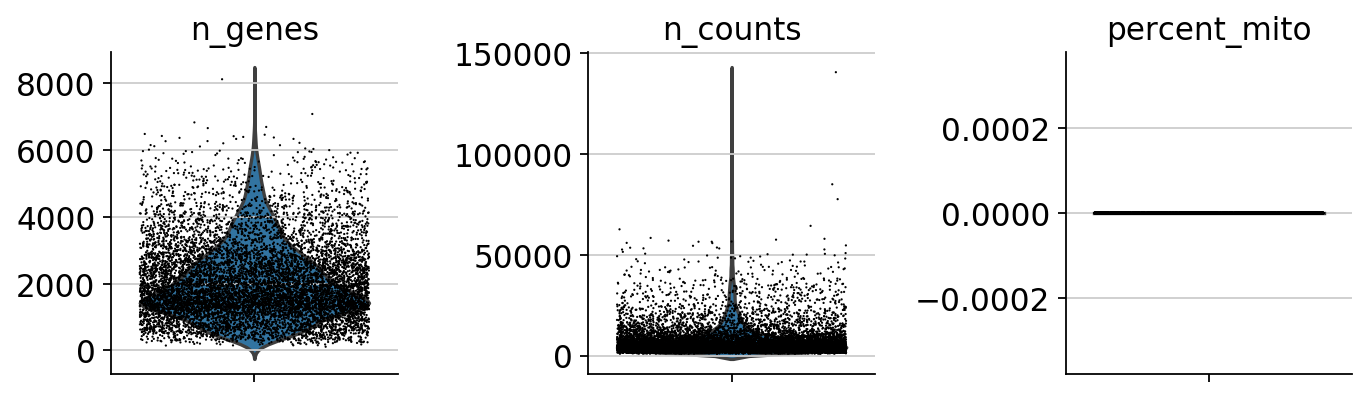

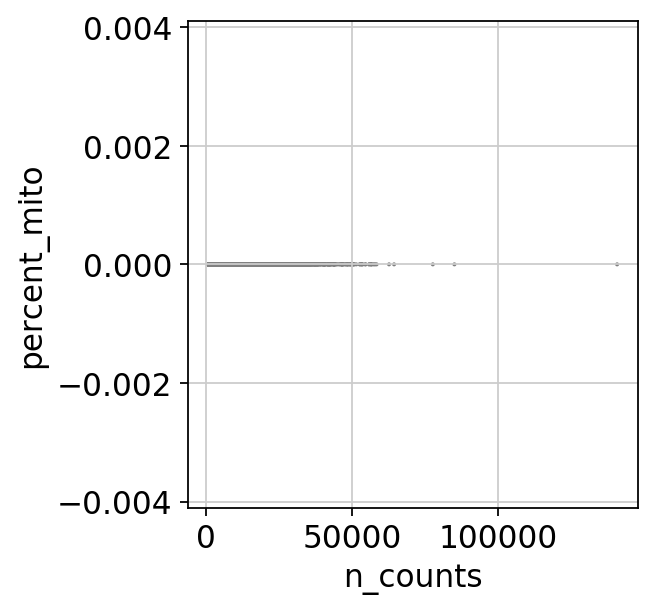

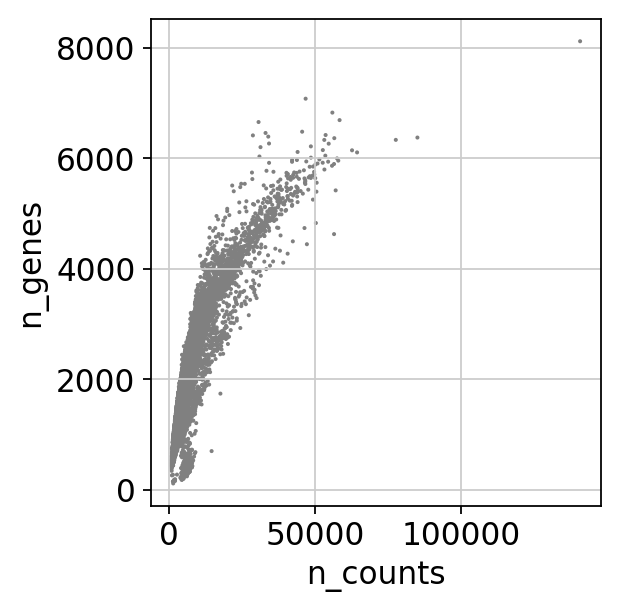

In [38]:
## filter the cells
sc.pl.violin(adata, ['n_genes', 'n_counts','percent_mito'],jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [39]:
adata = adata[adata.obs['n_genes'] < 6000, :]
adata = adata[adata.obs['percent_mito'] < 0.3, :]

In [40]:
adata

View of AnnData object with n_obs × n_vars = 9100 × 17344 
    obs: 'Batch', 'batch', 'CellID', 'cell_ontology_class', 'channel', 'tissue', 'CellType', 'n_genes', 'percent_mito', 'n_counts'
    var: 'gene_ids-0', 'gene_ids-1', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'n_cells'

In [41]:
## normalize
sc.pp.normalize_per_cell(adata)
adata.raw = sc.pp.log1p(adata, copy=True)

In [42]:
filter_result = sc.pp.filter_genes_dispersion(adata.X, min_mean=0.01, max_mean=15, min_disp=0.5)#2712genes

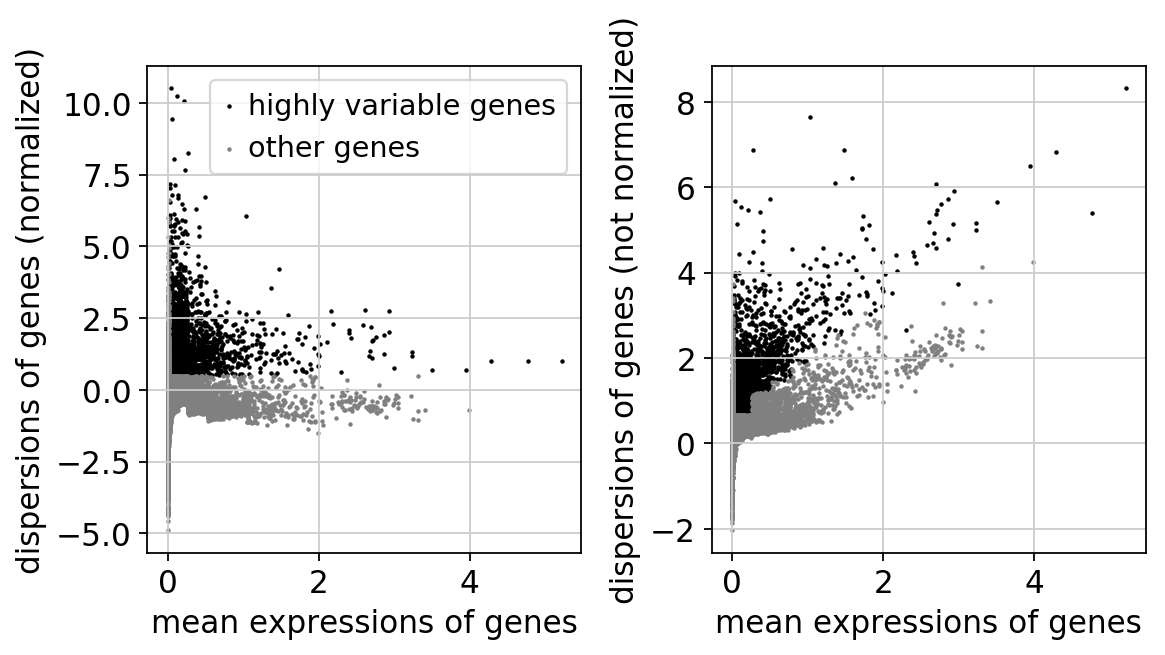

(9100, 2779)

In [43]:
sc.pl.filter_genes_dispersion(filter_result)
adata[:, filter_result.gene_subset].shape

In [44]:
hvgs = adata.var_names[filter_result.gene_subset]

In [45]:
## Actually do the filtering.
#adata1=adata
adata = adata[:, filter_result.gene_subset]

In [46]:
adata_base = adata.copy()

In [3]:
adata_base = sc.read_h5ad("adata_base.h5ad")
adata_base.obs['tissue'] = adata_base.obs['Batch'].apply(lambda x: x.split('-')[0])

In [47]:
## scale the data
sc.pp.scale(adata_base, max_value=10)

In [48]:
## PCA
sc.tl.pca(adata_base)
# Pick nPC
#sc.pl.pca_variance_ratio(adata, log=True, show=100, n_pcs=100)

In [49]:
#nPC=45
sc.pp.neighbors(adata_base, n_neighbors=10,n_pcs=45)

In [50]:
#run tSNE
sc.tl.tsne(adata_base,n_pcs=45,use_fast_tsne=True,n_jobs=20,perplexity=100)

saving figure to file ./figures/tsne_Batch_Baseline.svg


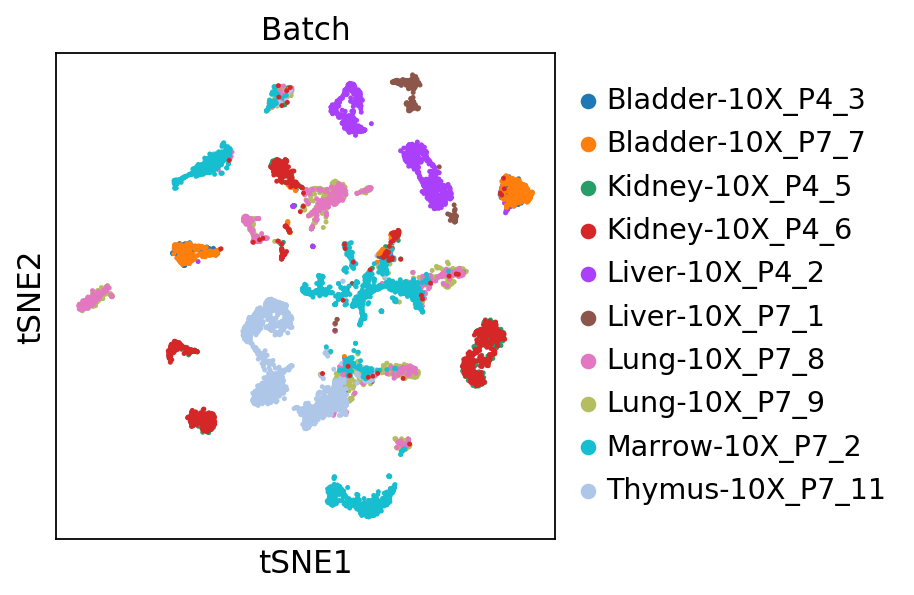

In [18]:
sc.pl.tsne(adata_base, color=['Batch'], size=20, save="_Batch_Baseline.svg")

saving figure to file ./figures/tsne_CellType_Baseline.svg


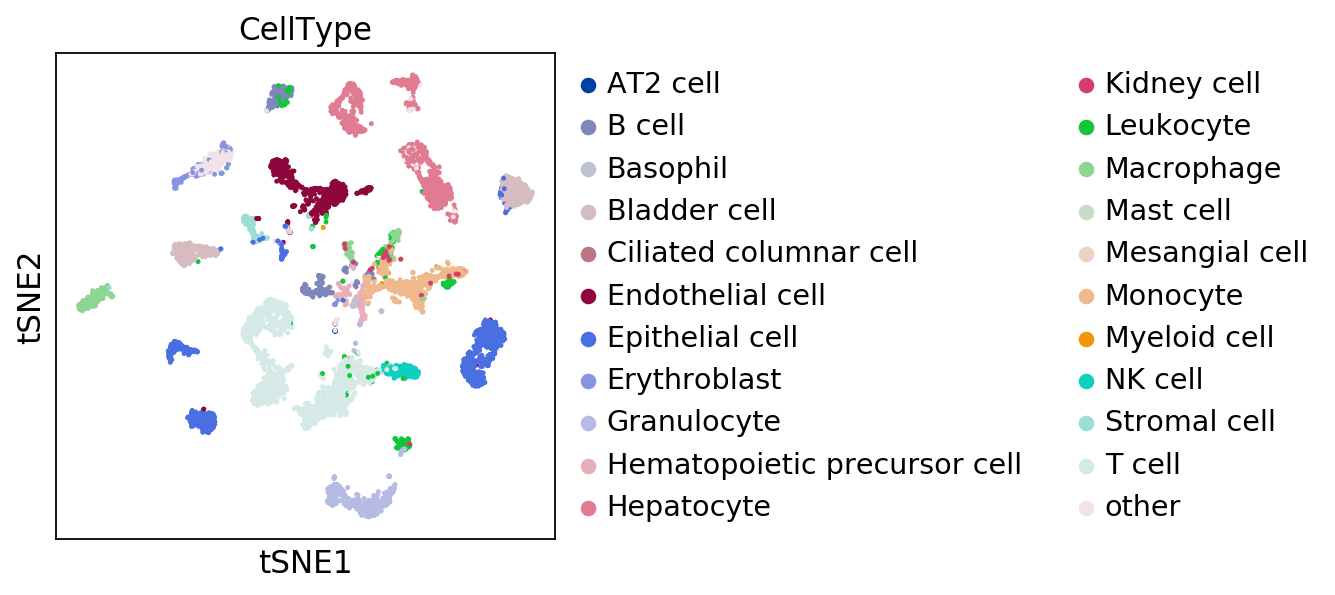

In [19]:
sc.pl.tsne(adata_base, color=['CellType'], size=20, save="_CellType_Baseline.svg")

saving figure to file ./figures/tsne_Tissue_Baseline.svg


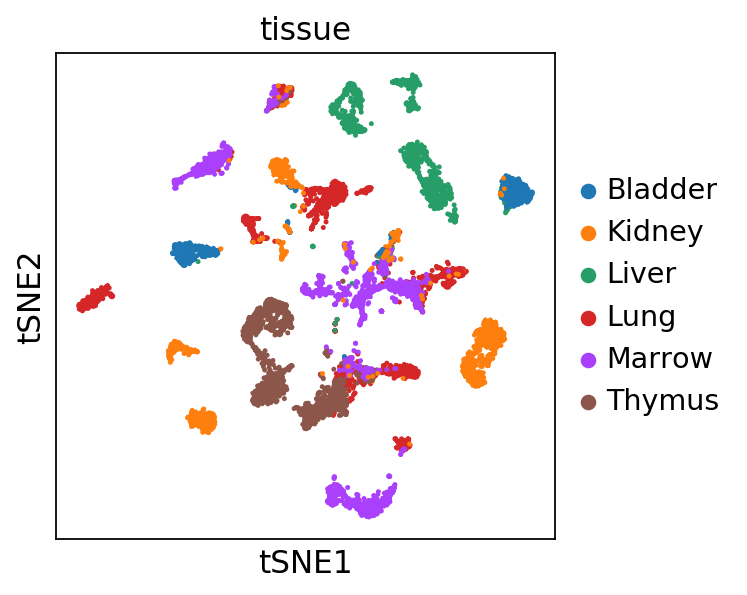

In [20]:
sc.pl.tsne(adata_base, color=['tissue'], size=20, save="_Tissue_Baseline.svg")

saving figure to file ./figures/tsne_Cluster_baseline.svg


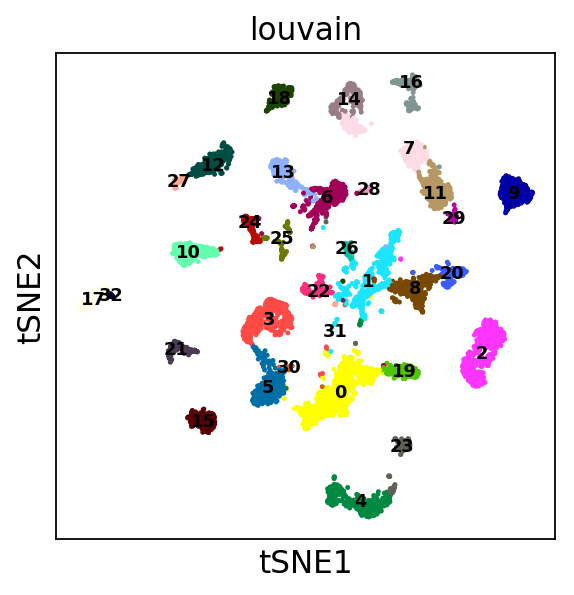

In [21]:
#res=0.6
sc.tl.louvain(adata_base, resolution=0.6)
sc.pl.tsne(adata_base, color='louvain',size=20,legend_loc='on data', legend_fontsize=8,save='_Cluster_baseline.svg')

In [119]:
adata_base.obs['louvain'].to_csv("./cluster_Baseline.txt", index=False)

In [56]:
adata_reg = adata.copy()

In [8]:
adata_reg = sc.read_h5ad("adata_reg.h5ad")
adata_reg.obs['tissue'] = adata_reg.obs['Batch'].apply(lambda x: x.split('-')[0])

In [57]:
## Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed. Scale the data to unit variance.
logging.info("start scanpy regout\n\n")
start = time.clock()
sc.pp.regress_out(adata_reg, ['n_counts'])
end = time.clock()
logging.debug("time scale: second")
logging.debug("scanpy regout total running time:\t%f", end - start)
logging.info("\n\nscanpy regout")

/home/ggj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ggj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [58]:
## scale the data
sc.pp.scale(adata_reg, max_value=10)

In [59]:
## PCA
sc.tl.pca(adata_reg)
# Pick nPC
#sc.pl.pca_variance_ratio(adata, log=True, show=100, n_pcs=100)

In [60]:
#nPC=45
sc.pp.neighbors(adata_reg, n_neighbors=10,n_pcs=45)

In [61]:
#run tSNE
sc.tl.tsne(adata_reg,n_pcs=45,use_fast_tsne=True,n_jobs=20,perplexity=100)

saving figure to file ./figures/tsne_Batch_reg.svg


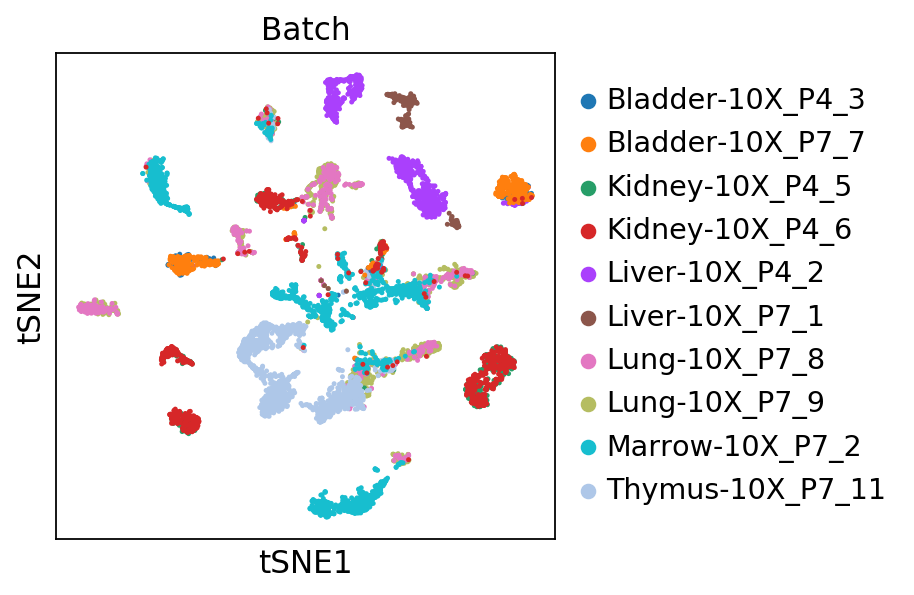

In [22]:
sc.pl.tsne(adata_reg, color=['Batch'], size=20, save="_Batch_reg.svg")

saving figure to file ./figures/tsne_Tissue_reg.svg


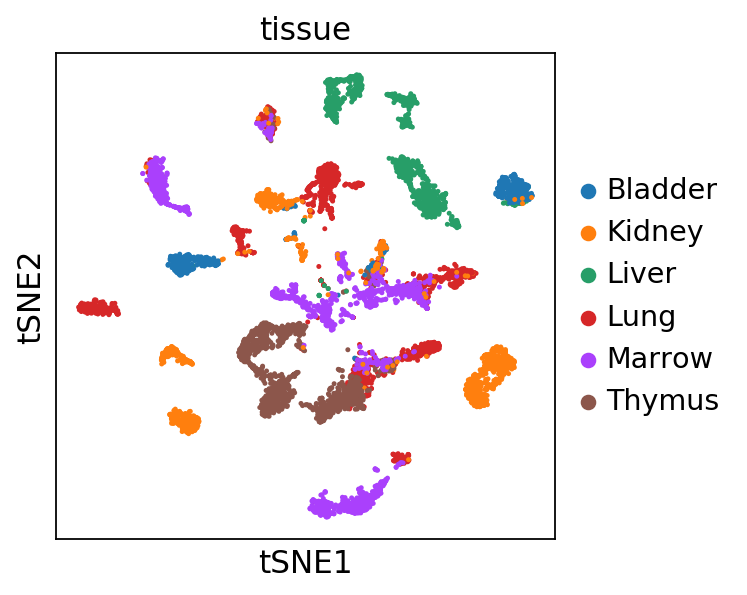

In [23]:
sc.pl.tsne(adata_reg, color=['tissue'], size=20, save="_Tissue_reg.svg")

saving figure to file ./figures/tsne_CellType_reg.svg


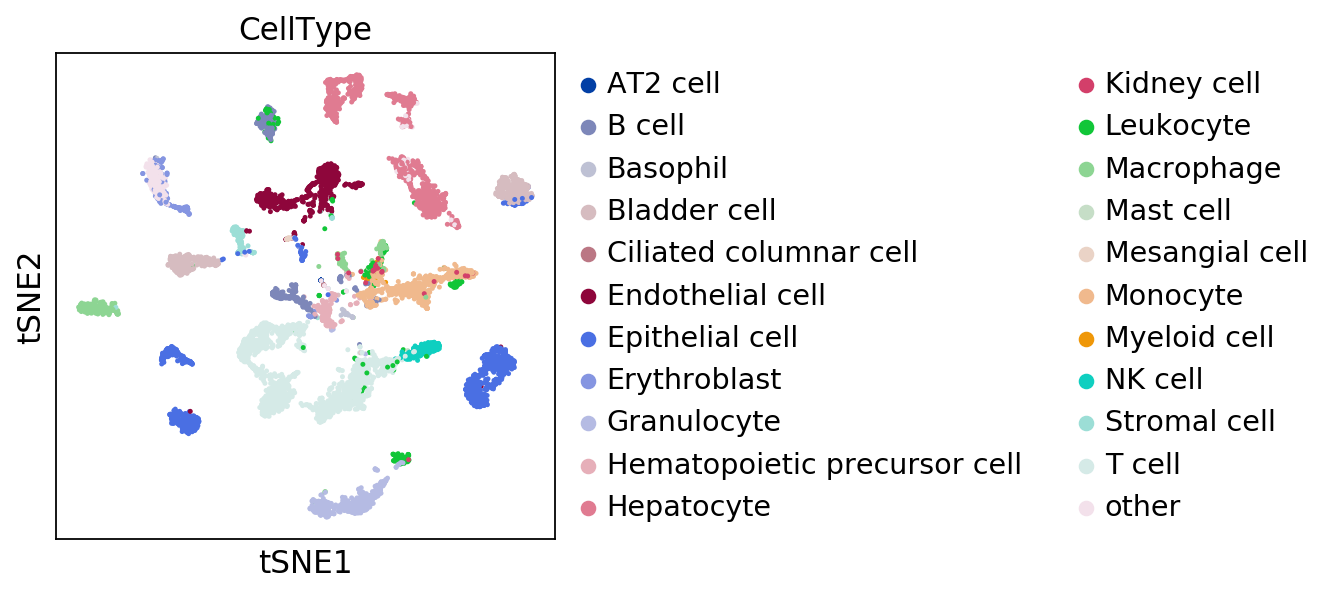

In [24]:
sc.pl.tsne(adata_reg, color=['CellType'], size=20, save="_CellType_reg.svg")

saving figure to file ./figures/tsne_Cluster_reg.svg


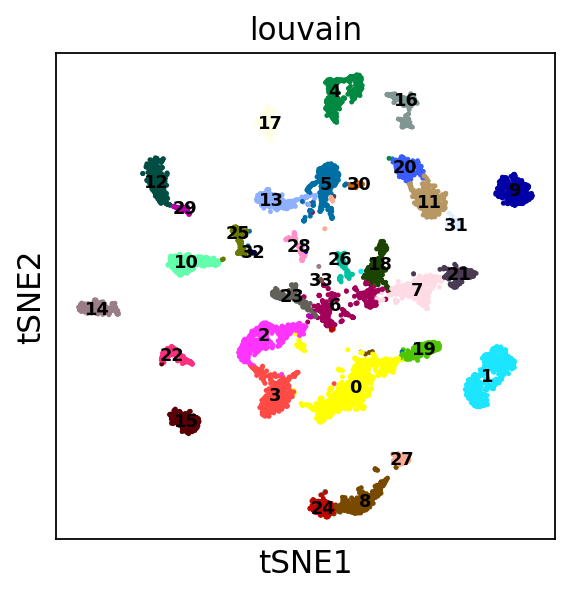

In [25]:
#res=0.6
sc.tl.louvain(adata_reg, resolution=0.6)
sc.pl.tsne(adata_reg, color='louvain',size=20,legend_loc='on data', legend_fontsize=8, save='_Cluster_reg.svg')

In [118]:
adata_reg.obs['louvain'].to_csv("./cluster_reg.txt", index=False)

In [68]:
adata_combat = adata.copy()

In [13]:
adata_combat = sc.read_h5ad("adata_combat.h5ad")
adata_combat.obs['tissue'] = adata_combat.obs['Batch'].apply(lambda x: x.split('-')[0])

In [69]:
logging.info("start scanpy combat\n\n")
start = time.clock()
sc.pp.combat(adata_combat, key='Batch')
end = time.clock()
logging.debug("time scale: second")
logging.debug("scanpy combat running time:\t%f", end - start)
logging.info("\n\nEnd scanpy combat")

/home/ggj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
Standardizing Data across genes.
found 10 batches
found 0 categorical variables:	
Fitting L/S model and finding priors
Finding parametric adjustments
/home/ggj/anaconda3/lib/python3.7/site-packages/scanpy/preprocessing/_combat.py:196: RuntimeWarning: divide by zero encountered in true_divide
  b_prior[i],


Adjusting data


/home/ggj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


In [70]:
## scale the data
sc.pp.scale(adata_combat, max_value=10)

In [71]:
## PCA
sc.tl.pca(adata_combat)
# Pick nPC
#sc.pl.pca_variance_ratio(adata, log=True, show=100, n_pcs=100)

In [72]:
#nPC=45
sc.pp.neighbors(adata_combat, n_neighbors=10,n_pcs=45)

In [73]:
#run tSNE
sc.tl.tsne(adata_combat,n_pcs=45,use_fast_tsne=True,n_jobs=20,perplexity=100)

saving figure to file ./figures/tsne_Batch_Combat.svg


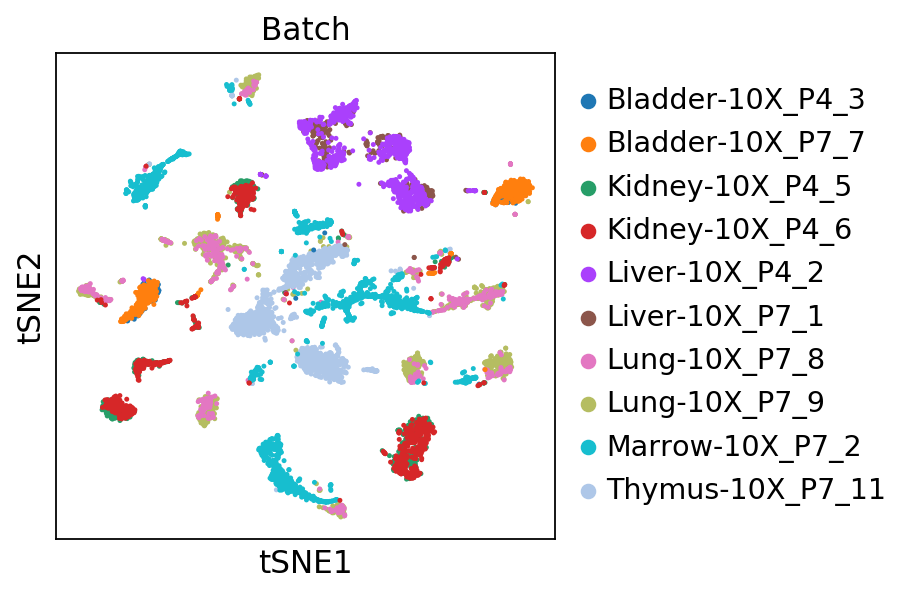

In [26]:
sc.pl.tsne(adata_combat, color=['Batch'], size=20, save="_Batch_Combat.svg")

saving figure to file ./figures/tsne_CellType_Combat.svg


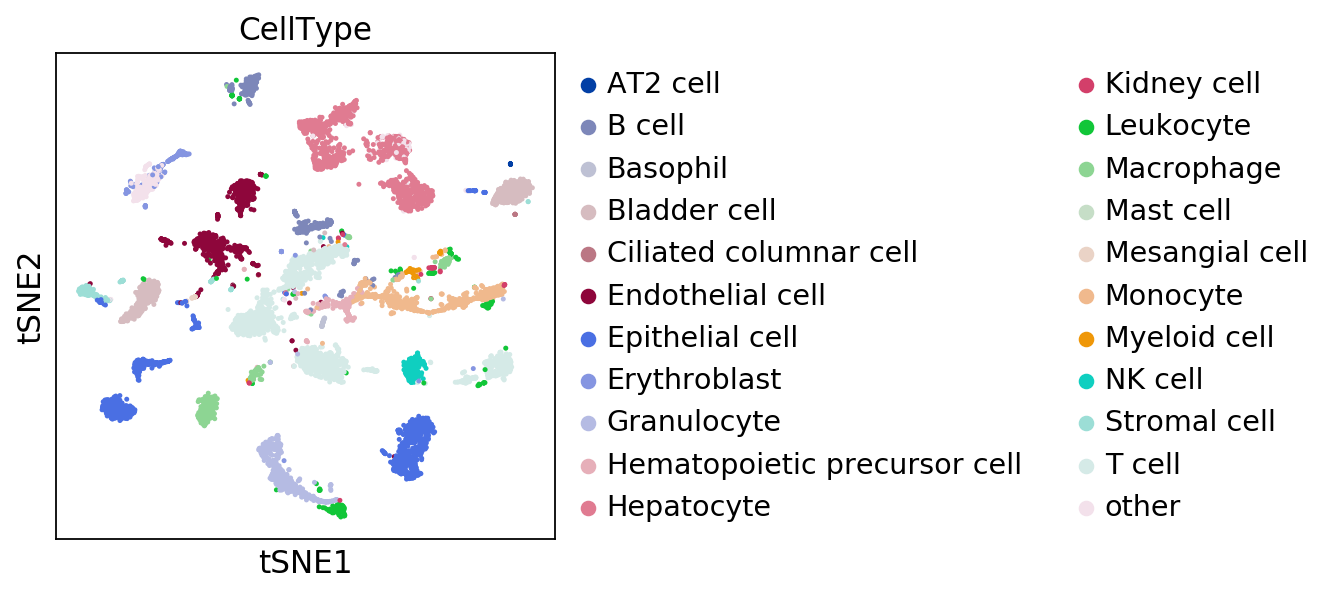

In [27]:
sc.pl.tsne(adata_combat, color=['CellType'], size=20, save="_CellType_Combat.svg")

saving figure to file ./figures/tsne_Tissue_Combat.svg


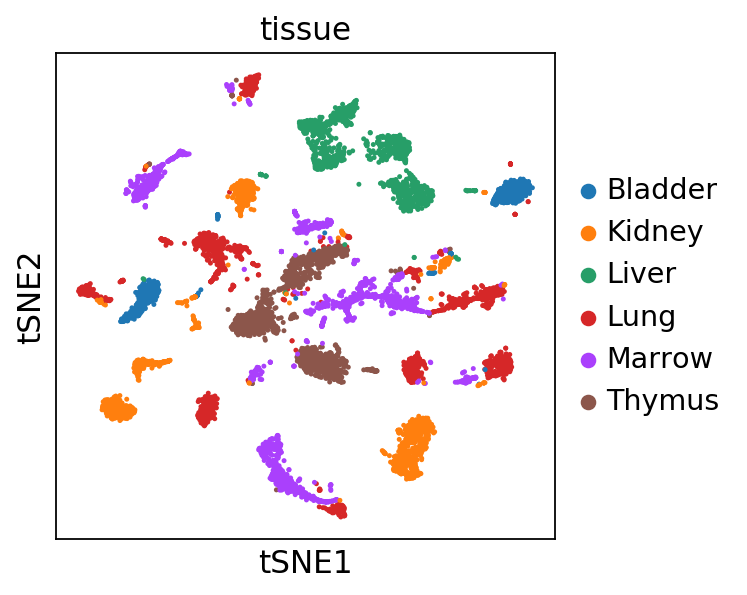

In [28]:
sc.pl.tsne(adata_combat, color=['tissue'], size=20, save="_Tissue_Combat.svg")

saving figure to file ./figures/tsne_Cluster_Combat.svg


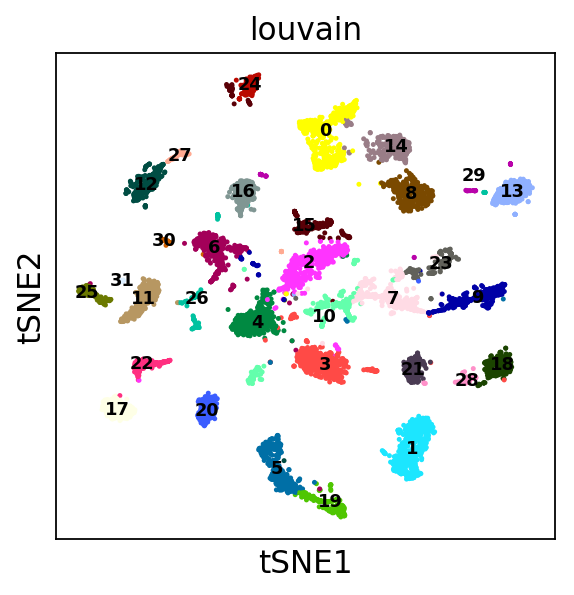

In [29]:
#res=0.6
sc.tl.louvain(adata_combat, resolution=0.6)
sc.pl.tsne(adata_combat, color='louvain',size=20,legend_loc='on data', legend_fontsize=8, save='_Cluster_Combat.svg')

In [80]:
adata_combat.obs['louvain'].to_csv("./cluster_Combat.txt", index=False)

In [81]:
adata_scanorama = adata.copy()

In [30]:
corrected_merged_dge = sc.read_h5ad("adata_scanorama.h5ad")
corrected_merged_dge.obs['tissue'] = corrected_merged_dge.obs['Batch'].apply(lambda x: x.split('-')[0])

In [82]:
adata_list = [adata_scanorama[adata_scanorama.obs['Batch'] == i] for i in adata_scanorama.obs['Batch'].unique()]

In [83]:
#check
print(adata_list[0].shape)
print(adata_list[0])

(1524, 2779)
View of AnnData object with n_obs × n_vars = 1524 × 2779 
    obs: 'Batch', 'batch', 'CellID', 'cell_ontology_class', 'channel', 'tissue', 'CellType', 'n_genes', 'percent_mito', 'n_counts'
    var: 'gene_ids-0', 'gene_ids-1', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'n_cells'


In [84]:
import scanorama

In [85]:
logging.info("start scanorama\n\n")
start = time.clock()
intergrated, corrected = scanorama.correct_scanpy(adata_list, return_dimred=True)
correct_end = time.clock()
corrected_merged_dge = corrected[0].concatenate(corrected[1:], join='outer')
merged_end = time.clock()
logging.debug("time scale: second")
logging.debug("scanoram correct batch time:\t%f", correct_end - start)
logging.debug("scanoram merging time:\t%f", merged_end - correct_end)
logging.debug("scanoram total running time:\t%f", merged_end - start)
logging.info("\n\nend scanorama")

/home/ggj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Found 2779 genes among all datasets
[[0.         0.11811024 0.95833333 0.22152341 0.06122449 0.01509186
  0.00099404 0.05724508 0.28018373 0.13845144]
 [0.         0.         0.09421488 0.03636364 0.30612245 0.01242236
  0.00826446 0.11806798 0.01487603 0.96859504]
 [0.         0.         0.         0.12339744 0.17006803 0.03205128
  0.         0.11806798 0.24358974 0.17788462]
 [0.         0.         0.         0.         0.01360544 0.00931677
  0.         0.00715564 0.35290007 0.04640884]
 [0.         0.         0.         0.         0.         0.01360544
  0.04081633 0.95918367 0.01360544 0.08163265]
 [0.         0.         0.         0.         0.         0.
  0.77329193 0.00931677 0.01242236 0.00621118]
 [0.         0.         0.         0.         0.         0.
  0.         0.13953488 0.         0.00220994]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.0608229  0.1431127 ]
 [0.         0.         0.         0.         0.         0.
  0.    

/home/ggj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.
/home/ggj/anaconda3/lib/python3.7/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/home/ggj/anaconda3/lib/python3.7/site-packages/scipy/sparse/lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):
/home/ggj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Pytho

In [86]:
corrected_merged_dge.obs = adata_scanorama.obs

In [87]:
## scale the data
sc.pp.scale(corrected_merged_dge, max_value=10)

In [88]:
## PCA
sc.tl.pca(corrected_merged_dge)
# Pick nPC
#sc.pl.pca_variance_ratio(adata, log=True, show=100, n_pcs=100)

In [89]:
#nPC=45
sc.pp.neighbors(corrected_merged_dge, n_neighbors=10,n_pcs=45)

In [90]:
#run tSNE
sc.tl.tsne(corrected_merged_dge,n_pcs=45,use_fast_tsne=True,n_jobs=20,perplexity=100)

... storing 'tissue' as categorical


saving figure to file ./figures/tsne_Batch_Scanorama.svg


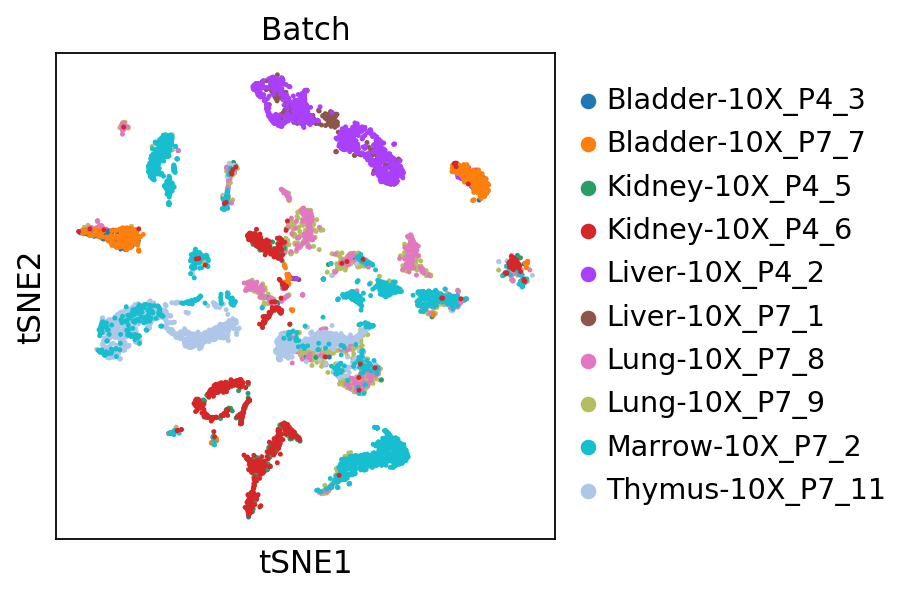

In [31]:
sc.pl.tsne(corrected_merged_dge, color=['Batch'], size=20, save="_Batch_Scanorama.svg")

saving figure to file ./figures/tsne_CellType_Scanorama.svg


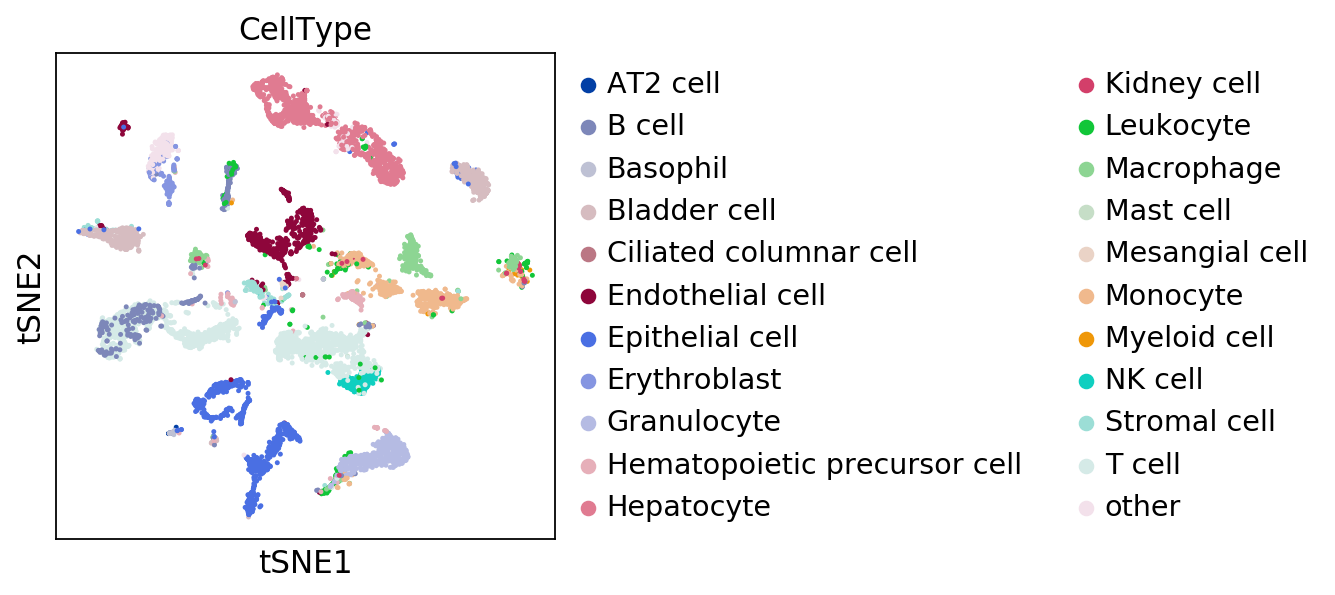

In [32]:
sc.pl.tsne(corrected_merged_dge, color=['CellType'], size=20, save="_CellType_Scanorama.svg")

saving figure to file ./figures/tsne_Tissue_Scanorama.svg


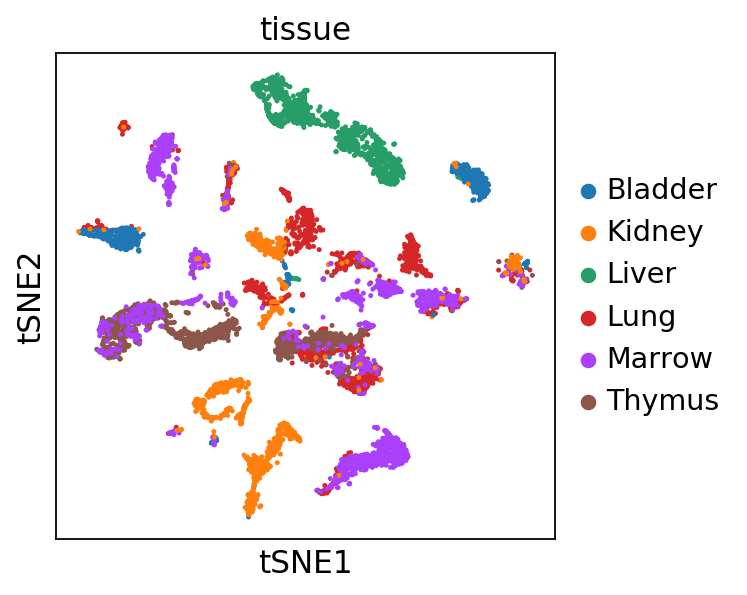

In [33]:
sc.pl.tsne(corrected_merged_dge, color=['tissue'], size=20, save="_Tissue_Scanorama.svg")

saving figure to file ./figures/tsne_Cluster_Scanorama.svg


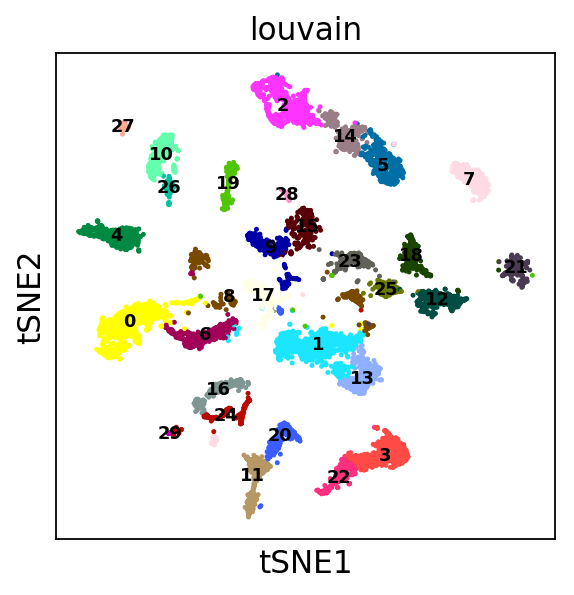

In [34]:
#res=0.6
sc.tl.louvain(corrected_merged_dge, resolution=0.6)
sc.pl.tsne(corrected_merged_dge, color='louvain',size=20,legend_loc='on data', legend_fontsize=8, save='_Cluster_Scanorama.svg')

In [96]:
corrected_merged_dge.obs['louvain'].to_csv("./cluster_Scanorama.txt", index=False)

In [35]:
mnn_adata = sc.read_h5ad("adata_mnns.h5ad")
mnn_adata.obs['tissue'] = mnn_adata.obs['Batch'].apply(lambda x: x.split('-')[0])

In [97]:
import mnnpy

In [98]:
logging.info("start MNNPY\n\n")
start = time.clock()
corrected = mnnpy.mnn_correct(*adata_list, var_subset=hvgs)
correct_end = time.clock()
mnn_adata = corrected[0]
merged_end = time.clock()
logging.debug("time scale: second")
logging.debug("MNNPY correct batch time:\t%f", correct_end - start)
logging.debug("MNNPY merging time:\t%f", merged_end - correct_end)
logging.debug("MNNPY total running time:\t%f", merged_end - start)
logging.info("\n\nend MNNPY")

Performing cosine normalization...


/home/ggj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Starting MNN correct iteration. Reference batch: 0
Step 1 of 9: processing batch 1
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 2 of 9: processing batch 2
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 3 of 9: processing batch 3
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 4 of 9: processing batch 4
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 5 of 9: processing batch 5
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 6 of 9: processing batch 6
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 7 of 9: processing batch 7
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying corr

/home/ggj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.
/home/ggj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [99]:
## scale the data
sc.pp.scale(mnn_adata, max_value=10)

In [100]:
## PCA
sc.tl.pca(mnn_adata)
# Pick nPC
#sc.pl.pca_variance_ratio(adata, log=True, show=100, n_pcs=100)

In [101]:
#nPC=45
sc.pp.neighbors(mnn_adata, n_neighbors=10,n_pcs=45)

In [102]:
#run tSNE
sc.tl.tsne(mnn_adata,n_pcs=45,use_fast_tsne=True,n_jobs=20,perplexity=100)

... storing 'tissue' as categorical


saving figure to file ./figures/tsne_Batch_MNNs.svg


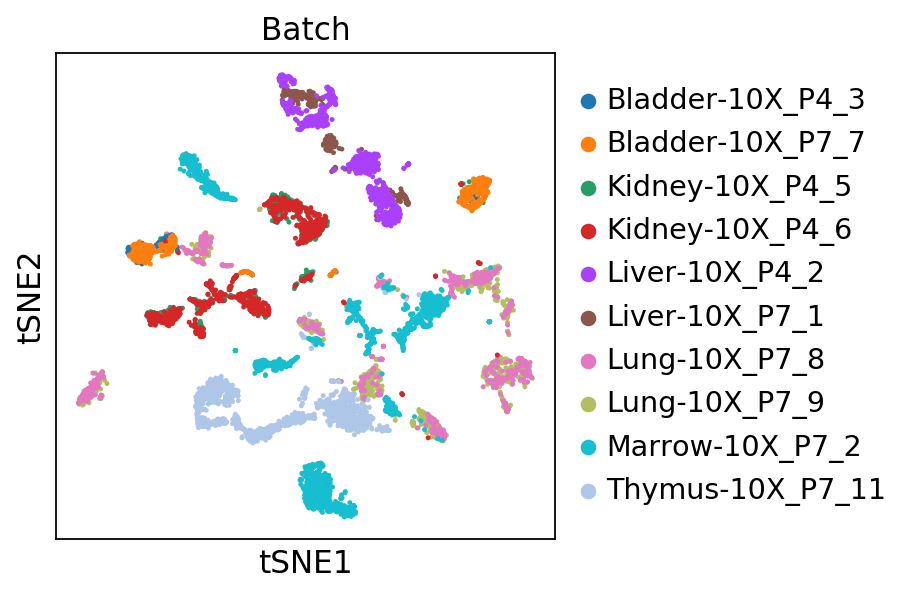

In [36]:
sc.pl.tsne(mnn_adata, color=['Batch'], size=20, save="_Batch_MNNs.svg")

saving figure to file ./figures/tsne_CellType_MNNs.svg


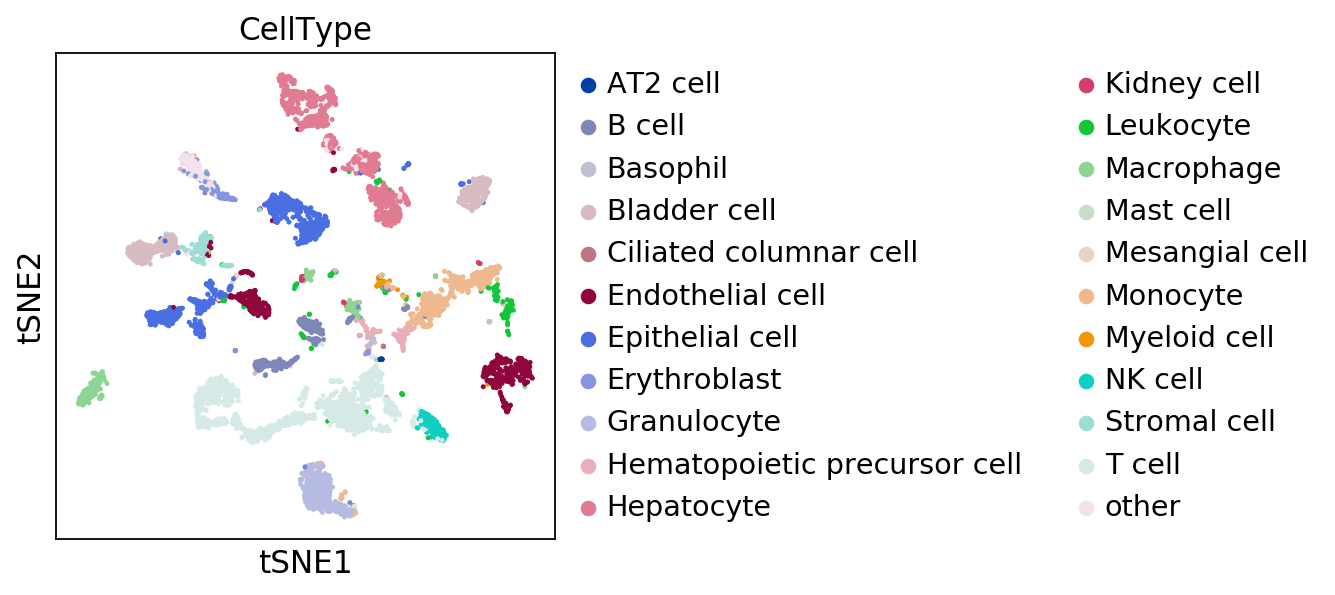

In [37]:
sc.pl.tsne(mnn_adata, color=['CellType'], size=20, save="_CellType_MNNs.svg")

saving figure to file ./figures/tsne_Tissue_MNNs.svg


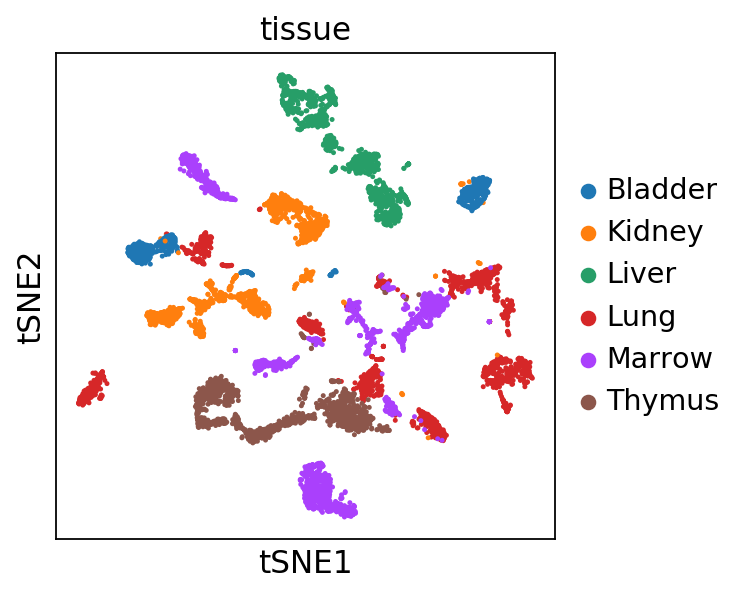

In [38]:
sc.pl.tsne(mnn_adata, color=['tissue'], size=20, save="_Tissue_MNNs.svg")

saving figure to file ./figures/tsne_Cluster_MNNs.svg


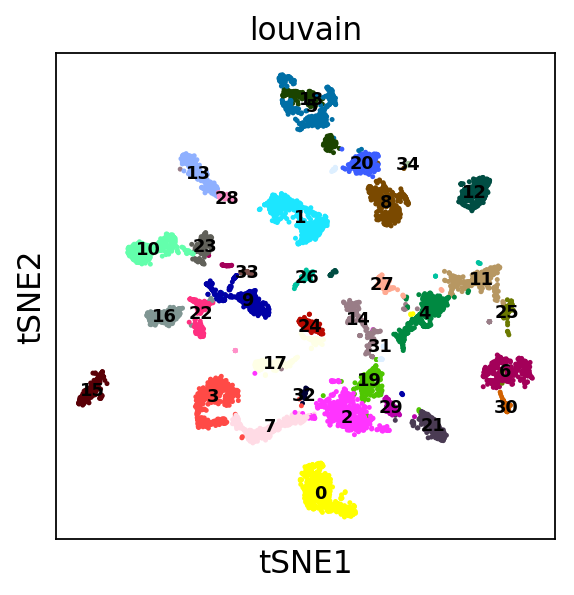

In [39]:
#res=0.6
sc.tl.louvain(mnn_adata, resolution=0.6)
sc.pl.tsne(mnn_adata, color='louvain',size=20,legend_loc='on data', legend_fontsize=8, save='_Cluster_MNNs.svg')

In [107]:
mnn_adata.obs['louvain'].to_csv("./cluster_MNNs.txt", index=False)

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind
from sklearn.metrics import silhouette_samples as sil

In [41]:
def calculate_silh(X, label_fname):
    labels = np.array( open(label_fname).read().rstrip().split() )
    idx = range(labels.shape[0])
    sil_val = sil(X[idx, :], labels[idx])
    print(np.median(sil_val))
    return sil_val

In [130]:
X = dge.X

In [42]:
X = sc.read_h5ad("dge.h5ad").X

In [43]:
# Baseline Scanpy.
print("silh score of scanpy baseline")
sil_non = calculate_silh(X, './cluster_Baseline.txt')
# regout Scanpy
print("silh score of scanpy Regout:")
sil_regout = calculate_silh(X, 'cluster_reg.txt')
# regout Scanpy
print("silh score of scanpy Combat:")
sil_scanpy = calculate_silh(X, './cluster_Combat.txt')
# scanorama scanpy
print("silh score of Scanoram:")
sil_scano = calculate_silh(X,"./cluster_Scanorama.txt")
# MNNs
print("silh score of MNNs:")
sil_MNN = calculate_silh(X,"./cluster_MNNs.txt")
print("\n\n-----Ttest------\n\n")
# t-test
print("ttest of regout to baseline:")
print(ttest_ind(sil_regout, sil_non))
print("ttest of combat to baseline:")
print(ttest_ind(sil_scanpy, sil_non))
print("ttest of scanoram to baseline:")
print(ttest_ind(sil_scano, sil_non))
print("ttest of MNNs to baseline:")
print(ttest_ind(sil_MNN, sil_non))
print("ttest of Combat to Regout:")
print(ttest_ind(sil_scanpy, sil_regout))
print("ttest of Scanoram to Regout:")
print(ttest_ind(sil_scano, sil_regout))
print("ttest of MNNs to Regout:")
print(ttest_ind(sil_MNN, sil_regout))
print("ttest of Scanoram to Combat:")
print(ttest_ind(sil_scano, sil_scanpy))
print("ttest of MNNs to Combat:")
print(ttest_ind(sil_MNN, sil_scanpy))
print("ttest of MNNs to Scanoram:")
print(ttest_ind(sil_MNN, sil_scano))

silh score of scanpy baseline
-0.16749358
silh score of scanpy Regout:
-0.16345906
silh score of scanpy Combat:
-0.15130867
silh score of Scanoram:
-0.27396065
silh score of MNNs:
-0.13677065


-----Ttest------


ttest of regout to baseline:
Ttest_indResult(statistic=2.4389601706702924, pvalue=0.014739082313203367)
ttest of combat to baseline:
Ttest_indResult(statistic=5.82739336236467, pvalue=5.72503941158966e-09)
ttest of scanoram to baseline:
Ttest_indResult(statistic=-10.30451109177663, pvalue=7.867665161089549e-25)
ttest of MNNs to baseline:
Ttest_indResult(statistic=7.311577094721293, pvalue=2.7497566646617324e-13)
ttest of Combat to Regout:
Ttest_indResult(statistic=3.4517268058827892, pvalue=0.0005582764049575647)
ttest of Scanoram to Regout:
Ttest_indResult(statistic=-12.929700178652952, pvalue=4.5024285692369227e-38)
ttest of MNNs to Regout:
Ttest_indResult(statistic=4.956985638426032, pvalue=7.223901600798925e-07)
ttest of Scanoram to Combat:
Ttest_indResult(statistic=-16.31

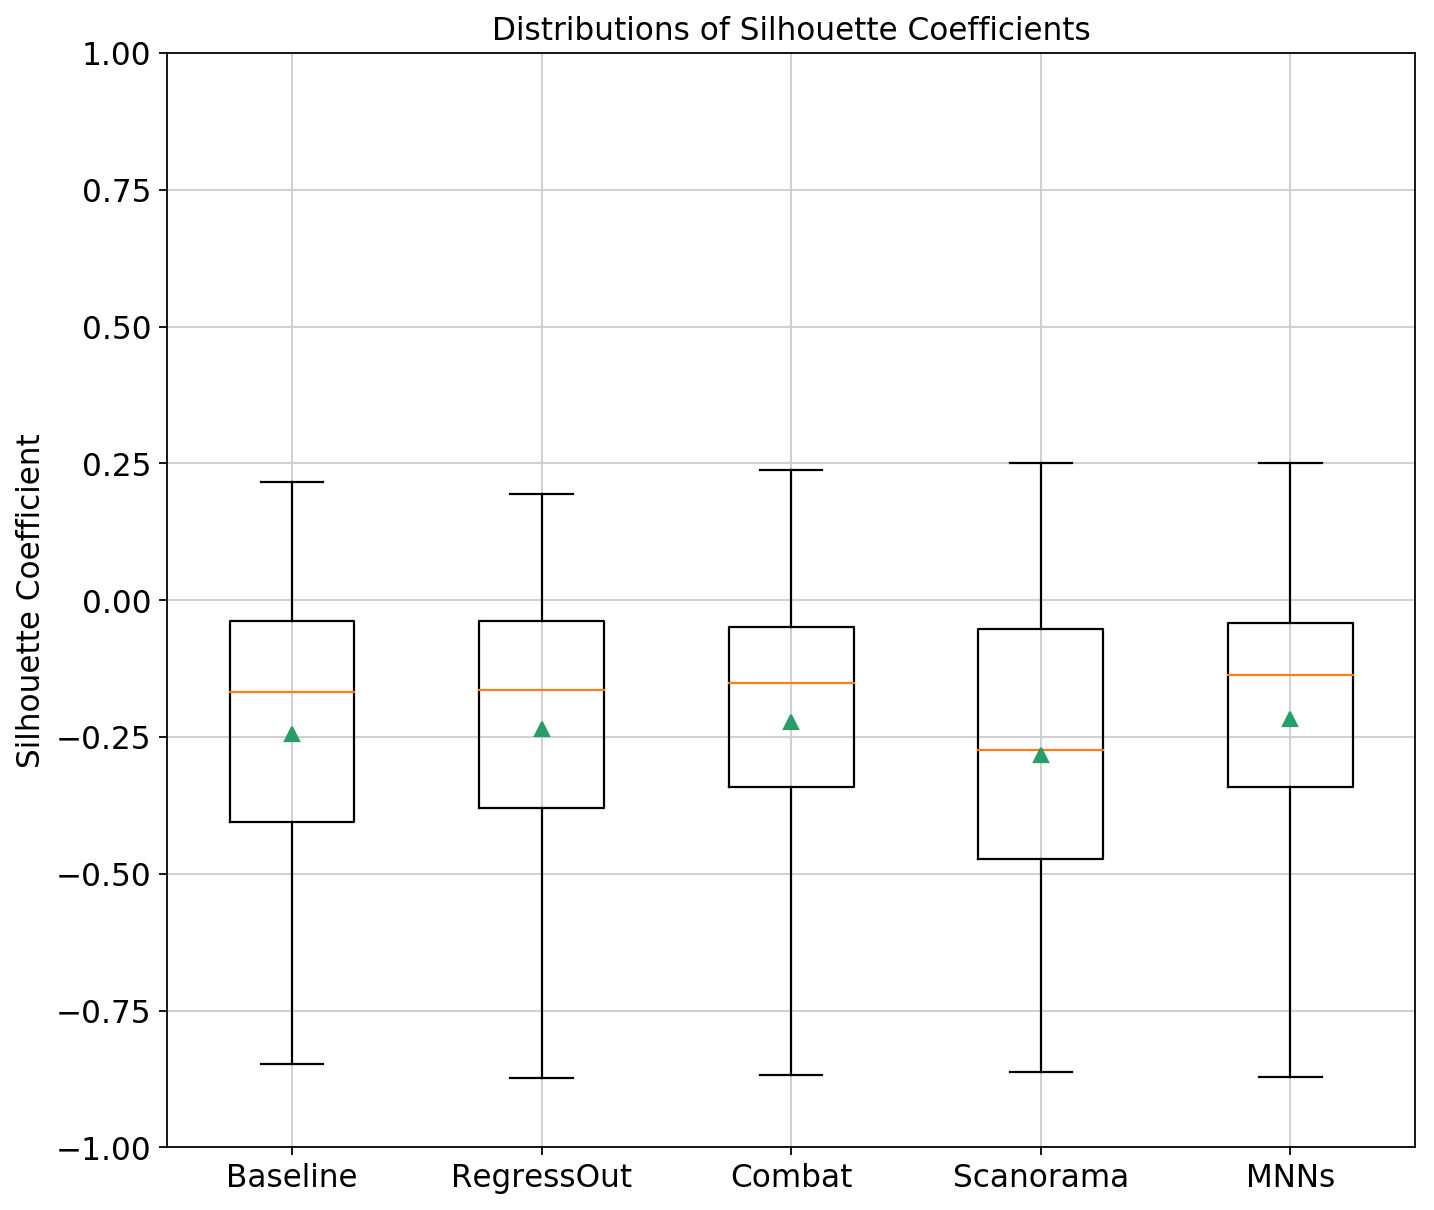

In [132]:
# visualization
plt.figure()
plt.boxplot([ sil_non, sil_regout, sil_scanpy, sil_scano, sil_MNN ], showmeans=True, whis='range')
plt.ylim([ -1, 1 ])
plt.title('Distributions of Silhouette Coefficients')
plt.xticks(range(1, 6), [ 'Baseline','RegressOut', 'Combat', 'Scanorama', "MNNs" ])
plt.ylabel('Silhouette Coefficient')
plt.savefig('silhouette_dge.svg')

In [133]:
X = adata.X

In [134]:
# Baseline Scanpy.
print("silh score of scanpy baseline")
sil_non = calculate_silh(X, './cluster_Baseline.txt')
# regout Scanpy
print("silh score of scanpy Regout:")
sil_regout = calculate_silh(X, 'cluster_reg.txt')
# regout Scanpy
print("silh score of scanpy Combat:")
sil_scanpy = calculate_silh(X, './cluster_Combat.txt')
# scanorama scanpy
print("silh score of Scanoram:")
sil_scano = calculate_silh(X,"./cluster_Scanorama.txt")
# MNNs
print("silh score of MNNs:")
sil_MNN = calculate_silh(X,"./cluster_MNNs.txt")
print("\n\n-----Ttest------\n\n")
# t-test
print("ttest of regout to baseline:")
print(ttest_ind(sil_regout, sil_non))
print("ttest of regout to baseline:")
print(ttest_ind(sil_scanpy, sil_non))
print("ttest of scanoram to baseline:")
print(ttest_ind(sil_scano, sil_non))
print("ttest of MNNs to baseline:")
print(ttest_ind(sil_MNN, sil_non))

silh score of scanpy baseline
0.063437924
silh score of scanpy Regout:
0.12592414
silh score of scanpy Combat:
0.087939456
silh score of Scanoram:
0.15152586
silh score of MNNs:
0.054908596


-----Ttest------


ttest of regout to baseline:
Ttest_indResult(statistic=9.19255783898393, pvalue=4.2399582018985954e-20)
ttest of regout to baseline:
Ttest_indResult(statistic=4.0675673265503045, pvalue=4.770660027736288e-05)
ttest of scanoram to baseline:
Ttest_indResult(statistic=14.933816640800565, pvalue=3.9345142462238764e-50)
ttest of MNNs to baseline:
Ttest_indResult(statistic=-5.165040895315621, pvalue=2.4292116341926425e-07)


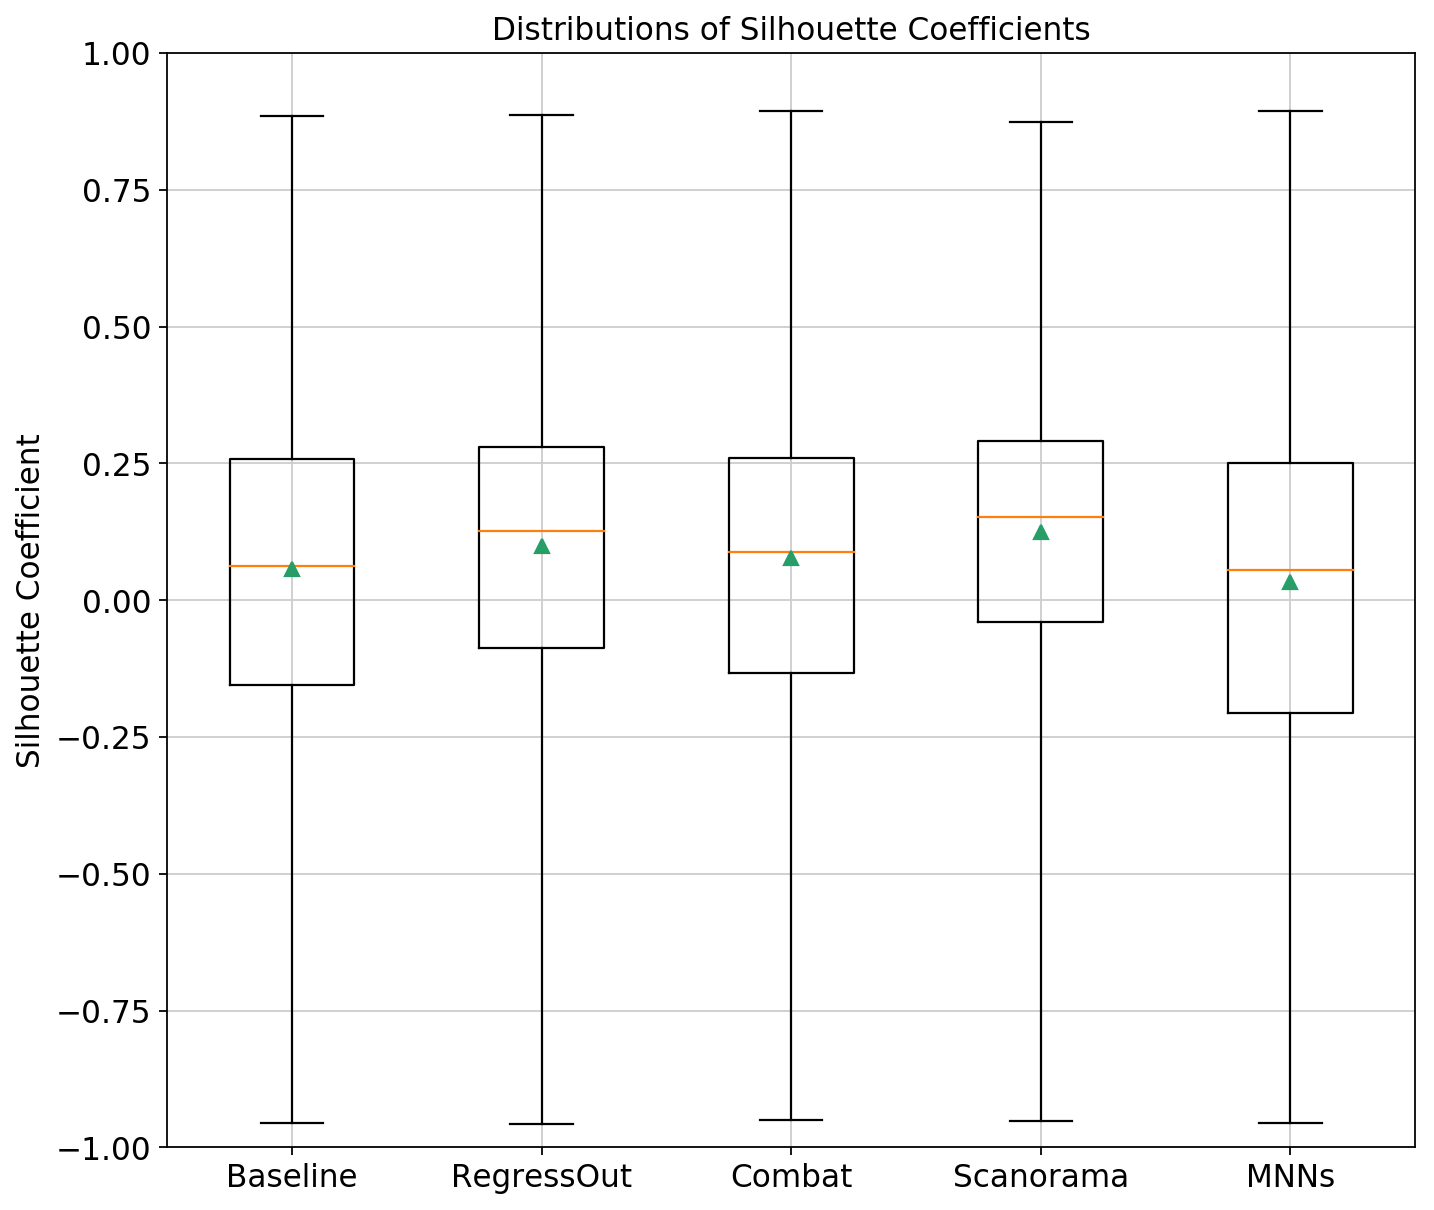

In [135]:
# visualization
plt.figure()
plt.boxplot([ sil_non, sil_regout, sil_scanpy, sil_scano, sil_MNN ], showmeans=True, whis='range')
plt.ylim([ -1, 1 ])
plt.title('Distributions of Silhouette Coefficients')
plt.xticks(range(1, 6), [ 'Baseline','RegressOut', 'Combat', 'Scanorama', "MNNs" ])
plt.ylabel('Silhouette Coefficient')
plt.savefig('silhouette_norm.svg')

In [136]:
# Baseline Scanpy.
print("silh score of scanpy baseline")
sil_non = calculate_silh(adata_base.X, './cluster_Baseline.txt')
# Regout Scanpy.
print("silh score of scanpy Regout")
sil_non = calculate_silh(adata_reg.X, './cluster_Baseline.txt')
# regout Scanpy
print("silh score of scanpy Combat:")
sil_scanpy = calculate_silh(adata_combat.X, './cluster_Combat.txt')
# scanorama scanpy
print("silh score of Scanoram:")
sil_scano = calculate_silh(corrected_merged_dge.X,"./cluster_Scanorama.txt")
# MNNs
print("silh score of MNNs:")
sil_MNN = calculate_silh(mnn_adata.X,"./cluster_MNNs.txt")

silh score of scanpy baseline
0.0065044714
silh score of scanpy Regout
0.0050599417
silh score of scanpy Combat:
-0.12075181132141755
silh score of Scanoram:
0.030461758
silh score of MNNs:
-0.03000685


In [137]:
print("\n\n-----Ttest------\n\n")
# t-test
print("ttest of regout to baseline:")
print(ttest_ind(sil_regout, sil_non))
print("ttest of regout to baseline:")
print(ttest_ind(sil_scanpy, sil_non))
print("ttest of scanoram to baseline:")
print(ttest_ind(sil_scano, sil_non))
print("ttest of MNNs to baseline:")
print(ttest_ind(sil_MNN, sil_non))



-----Ttest------


ttest of regout to baseline:
Ttest_indResult(statistic=18.363508183025, pvalue=1.215700687310014e-74)
ttest of regout to baseline:
Ttest_indResult(statistic=-73.87971186689026, pvalue=0.0)
ttest of scanoram to baseline:
Ttest_indResult(statistic=18.46247716201481, pvalue=2.0211672076051472e-75)
ttest of MNNs to baseline:
Ttest_indResult(statistic=-13.907670301819346, pvalue=9.529442971488204e-44)


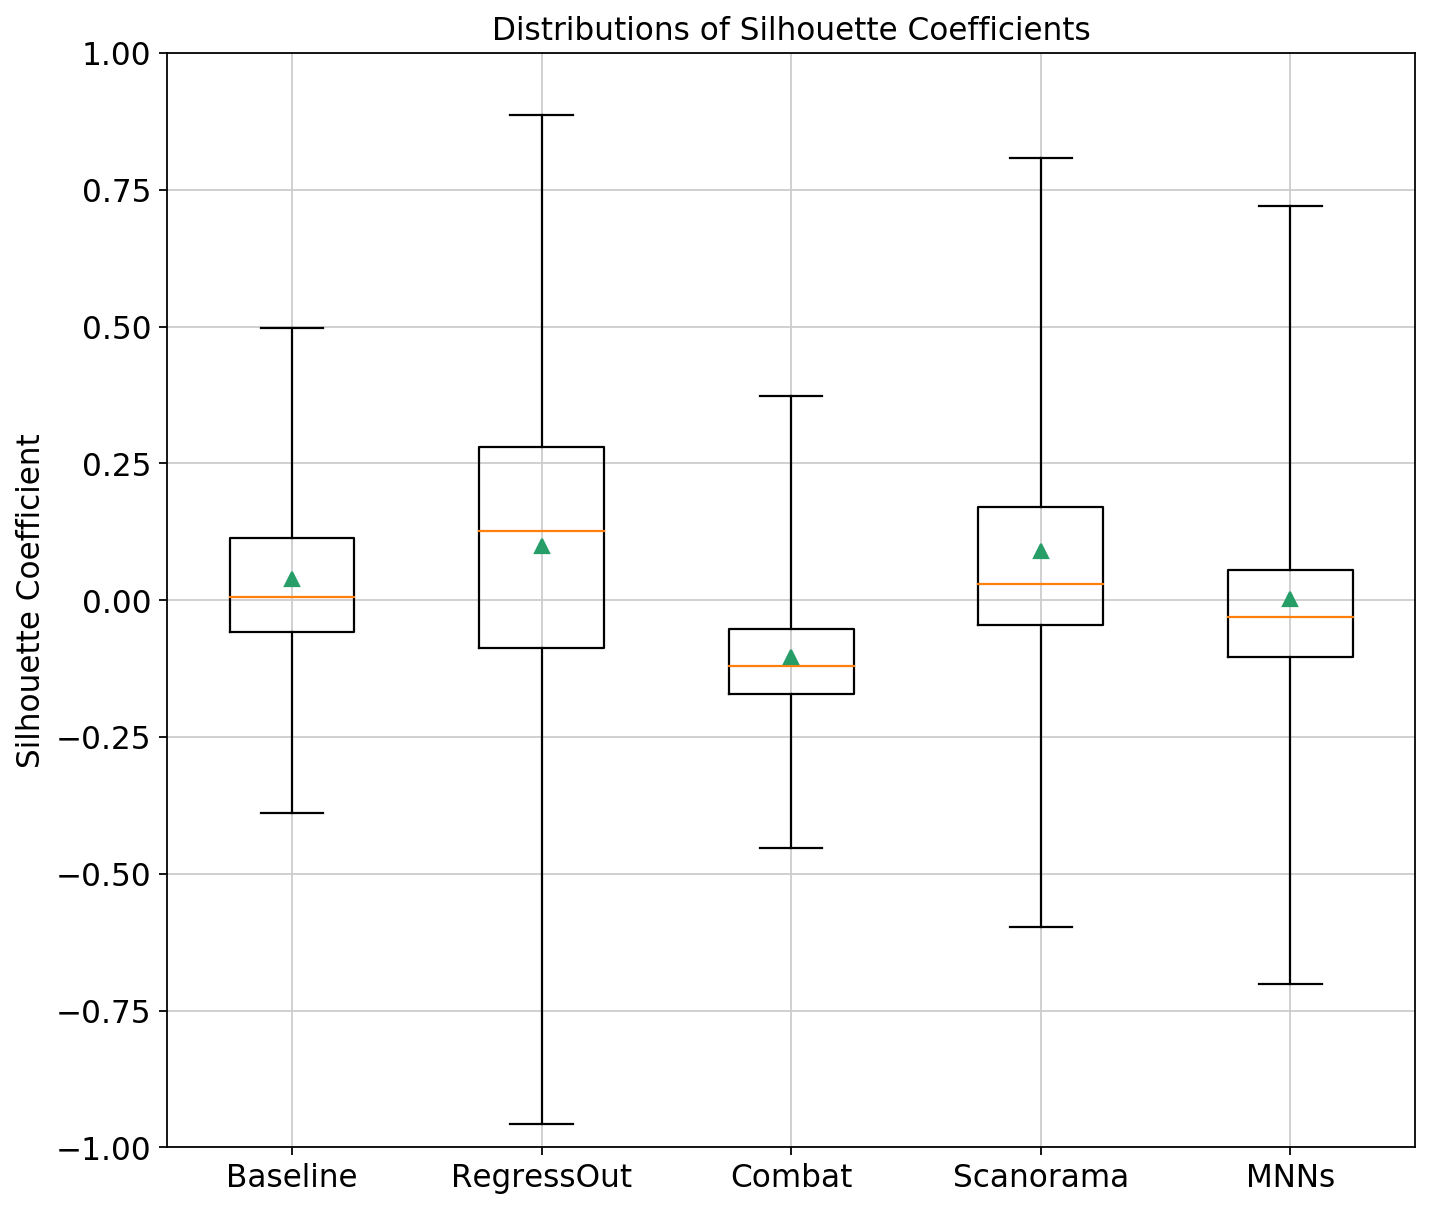

In [138]:
# visualization
plt.figure()
plt.boxplot([ sil_non, sil_regout, sil_scanpy, sil_scano, sil_MNN ], showmeans=True, whis='range')
plt.ylim([ -1, 1 ])
plt.title('Distributions of Silhouette Coefficients')
plt.xticks(range(1, 6), [ 'Baseline','RegressOut', 'Combat', 'Scanorama', "MNNs" ])
plt.ylabel('Silhouette Coefficient')
plt.savefig('silhouette_scale.svg')

In [139]:
dge.write("./dge.h5ad")
adata.write("./adata.h5ad")
adata_base.write("./adata_base.h5ad")
adata_combat.write("./adata_combat.h5ad")
adata_reg.write("./adata_reg.h5ad")
corrected_merged_dge.write("./adata_scanorama.h5ad")
mnn_adata.write("./adata_mnns.h5ad")

... storing 'cell_ontology_class' as categorical
... storing 'channel' as categorical
... storing 'tissue' as categorical
... storing 'CellType' as categorical
